# Markov Decision Process

In this process an agent learns to estimate the expected sum of discounted future rewards for each state, or the expected sum of discounted future rewards for each action in each state, then uses this knowledge to decide how to act.

Stochastic Process:
- Fixed number of states
- Randomly evolves from one state to another at each step
- Probability to evolve from a state $s$ to a state $s'$ is fixed and depends on only on the pair $(s, s')$, not on past states

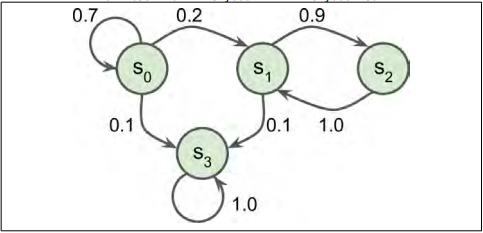
**Image taken from: Hands-on Machine Learning with Scikit-Learn & Tensorflow - A. Geron**


The above image is an example of a Markov chain with 4 states. If the process starts at $s_0$ there is 70% chance it will remain in the same state at the next step. Once it leaves the state it will never come back because there are no other states that return to $s_0$. If it goes to $s_1$ it will them most likely go to state $s_2$ (probability is 90%) and then immediately back to state $s_1$. There is also the possibility it may alternate between these two states, but it will eventually fall back so $s_3$ and remain there forever. $s_3$ is a terminal state because once it's in this state it cannot leave.

Markov decision process (MDP) is slightly different to the Markov chain process. The transition to different states returns some reward (positive or negative), and the agent's goal is to find a policy that will maximise the rewards over time. An example of this is shown below:

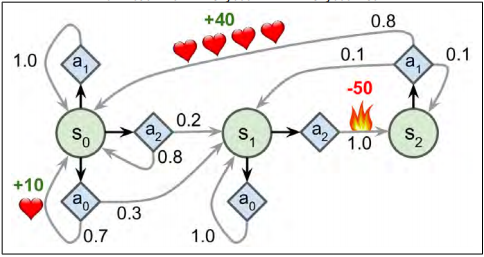
**Image taken from: Hands-on Machine Learning with Scikit-Learn & Tensorflow - A. Geron**

The MDP in the figure above has three states and up to three possible discrete actions at each step. The process starts at $s_0$, the agent can choose between actions $a_0$, $a_1$, $a_2$. If it chooses actions $a_1$, it just remains in state $s_0$ with certainty, and without and reward. It can thus decide to stay there forever. If action $a_0$ is chosen, it has 70% probability of gaining a reward of +10 and remaining in state $s_0$. It can then try again and again to gain as much reward as possible. But at one point it is going to end up in state $s_1$. In state $s_1$ it has only two possible actions $a_0$ and $a_2$. Eventually it will move onto state $s_2$ and get a negative reward of -50. In state $s_2$ it has no other choice but take action $a_1$, which will most likely lead it back to state $s_0$, gaining a reward of +40 along the way. Looking at this figure what is the best strategy to maximise the reward over time?

The optimal value of any state $s$, noted $V^*(s)$ can be estimated by taking the sum of all discounted future rewards the agent can expect on average after it reaches a state $s$, assuming it acts optimally. If the agent acts optimally, then the following (Bellman Optimality) equation applies. The equation is recursive and states that if the agent acts optimally, then the optimal value of the current state is equal to the reward it will get on average after taking one optimal action, plus the expected optimal value of all possible next states that this action can lead to.

\begin{equation}
V^*(s) = \mathop{max}_{\textbf{a}} \sum_{s'}T(s,a,s')[R(s,a,s')+\gamma.V^*(s')] \text{ for all s}
\end{equation}

- $V^*(s)$ - Optimal state value
- $R(s,a,s')$ - Transition probability from state $s$ to that state $s'$ given the agent chose action $a$
- $T(s,a,s')$ - Is the reward that the agent gets when it goes from state $s$ to state $s'$, giben the agent chose action $a$
- $\gamma$ - The discount rate

Equation leads to directly to an algorithm that can precisely estimate the optimal state value of every possible state:
- Initiate all state values to zero
- Iteratively update them using the value iteration algorithm (below)

\begin{equation}
V_{k+1}(s) \leftarrow \mathop{max}_{\textbf{a}} \sum_{s'}T(s,a,s')[R(s,a,s')+\gamma.V^*(s')] \text{ for all s}
\end{equation}

- $V_k(s)$ - estimated value of state $s$ at the $k^{th}$ iteration of the algorithm

Knowing the optimal state is useful but it doesn't tell the agent what to do. It is possible to find the optimal state using Q-value of a state-action pair $(s, a)$, noted $Q^*(s,a)$, is the sum of all the discounted future rewards that agent can expect on average after it reaches that state $s$ and chooses action $a$, but before it sees the outcome of this action, assuming it acts optimally. Below is the quation for the Q-value iteration algorithm.

\begin{equation}
Q_{k+1}(s,a) \leftarrow \sum_{s'}T(s,a,s')[R(s,a,s')+\gamma\text{ }.\text{ }\mathop{max}_{\textbf{a'}}\text{ }Q_k(s', a')] \text{ for all }(s,a)
\end{equation}

Once you have optimal Q-values, defining the optimal policy, notes $\pi^*(s)$, is trivial: when the agent is in state $s$, it should choose the action with the highest Q-value for that state:
\begin{equation}
\pi^*(s) = \mathop{argmax}_{\textbf{a}} Q^*(s,a)
\end{equation}